In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import xbout
import scipy
import xhermes

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))

from hermes3.utils import *
from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from code_comparison import *

%load_ext autoreload
%autoreload 2

plt.close("all")
%matplotlib inline

print("Done")

Done


In [6]:
db = CaseDB(
    case_dir = r"C:\Users\Mike\OneDrive\Project\collab\tech\cases",
    grid_dir = r"C:\Users\Mike\OneDrive\Project\collab\tech\grid"
)

toload = [ 
    dict(name="tune", id="m4ab-tune_albedo", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="tune_4x", id="m4abc-4x_power", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="carbon", id="m3b-add_carbon", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="carbon_4x", id="m3bb-4x_power_step", unnormalise_geom = True, use_xhermes = True, squash = True), 
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)


- Reading case m4ab-tune_albedo
-----------------------
- Looking for squash file
- Squash file found. squash date 06/16/2024, 18:17:37, dmp file date 06/16/2024, 18:00:50

Unnormalising with xHermes
- Reading case m4abc-4x_power
-----------------------
- Looking for squash file
- Squash file found. squash date 01/10/2025, 11:44:27, dmp file date 01/10/2025, 11:22:10

Unnormalising with xHermes


# Convergence

In [22]:
from netCDF4 import Dataset

In [18]:
%matplotlib inline

In [8]:
cs.keys()

dict_keys(['tune', 'tune_4x'])

c:\Users\Mike\OneDrive\Project\python-packages\sdtools\hermes3\plotting.py:756: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if "t" in  cases[name].dims.keys():


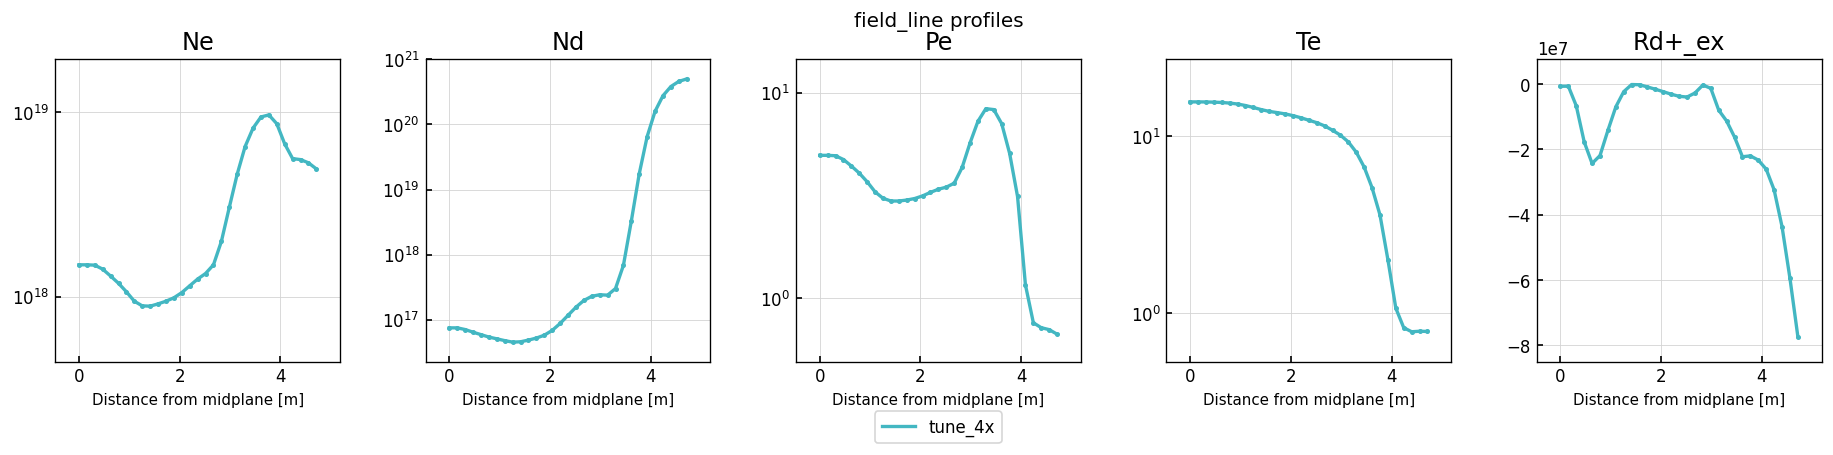

In [3]:
toplot = {}

for case in cs:
    toplot[case] = cs[case].ds.isel(t=-1)
    
lineplot(
    toplot,
    clean_guards = False,
    params = ["Ne", "Nd", "Pe","Te", "Rd+_ex"],
    regions = ["field_line"],
)

In [34]:
ds.metadata["ixseps1"]

20

In [36]:
ds.sizes

Frozen({'x': 40, 'theta': 108, 't': 477})

In [4]:
for name in cs:
# for name in ["addc_4x"]:
    cs[name].ds.hermesm.get_front_position(more_fronts = True)


c:\Users\Mike\OneDrive\Project\python-packages\sdtools\hermes3\front_tracking.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  df.index = range(ds.dims["t"])
c:\Users\Mike\OneDrive\Project\python-packages\sdtools\hermes3\front_tracking.py:48: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for t in range(ds.dims["t"]):


In [39]:
cs.keys()

dict_keys(['tune', 'tune_4x'])

Text(0.5, 0, 't [ms]')

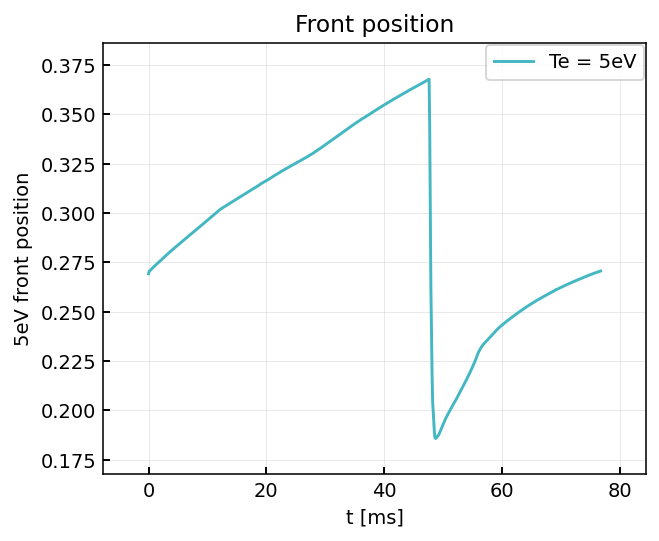

In [5]:
ds = cs["tune_4x"].ds

fig, ax = plt.subplots()
ax.plot((ds["t"] - ds["t"][0])*1000, ds["front_poldist_5eV"], label = "Te = 5eV")
# ds["front_poldist_5eV"].plot(ax = ax, label = "Te = 5eV")
# ds["front_poldist_Rpeak"].plot(ax = ax, label = "Radiation peak")
# ds["front_poldist_Nepeak"].plot(ax = ax, label = "Ne peak")
# ds["front_poldist_RECpeak"].plot(ax = ax, label = "Recombination peak")
ax.legend()
ax.set_ylabel("5eV front position")
ax.set_title("Front position")
ax.set_xlabel("t [ms]")